In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tkinter import *
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
%matplotlib inline
print("All packages are imported successfully")

All packages are imported successfully


In [25]:
#Load the iris dataset2
iris_data = pd.read_csv('Iris.csv')

In [26]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [28]:
#Now remove rows that contains a null value using dropna() method
iris_data.dropna(inplace=True)

In [29]:
#Split the data into features
X = iris_data[['SepalLengthCm']]
y = iris_data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Here I have assigned 20% of test data and 80% of training data

In [30]:
#Now create an instance of the Logistic Regression model
model = LogisticRegression()
#Now fit the data into the model
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# GUI functions
def predict_species():
    # Get the sepal length from the input field
    sepal_length = float(sepal_length_entry.get())

    # Make a prediction using the trained model
    prediction = model.predict([[sepal_length]])

    # Display the predicted species
    predicted_species_label.config(text=f"Predicted Species: {prediction[0]}")

    # Update scatter plot with input sepal length
    scatter_plot.clear()
    scatter_plot.scatter(iris_setosa['SepalLengthCm'], np.zeros_like(iris_setosa['SepalLengthCm']), color='r', label='Setosa')
    scatter_plot.scatter(iris_versicolor['SepalLengthCm'], np.zeros_like(iris_versicolor['SepalLengthCm']), color='g', label='Versicolor')
    scatter_plot.scatter(iris_virginica['SepalLengthCm'], np.zeros_like(iris_virginica['SepalLengthCm']), color='b', label='Virginica')
    scatter_plot.scatter(sepal_length, 0, color='k', label='Input')
    scatter_plot.set_xlabel('Sepal Length')
    scatter_plot.set_ylabel('Dummy')
    scatter_plot.set_title('Iris Flower Classification')
    scatter_plot.legend()
    plot_canvas.draw()

In [32]:
def display_accuracy():
    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predictions)

    # Display the accuracy in the GUI
    accuracy_label.config(text=f"Accuracy: {accuracy}")

In [33]:
# GUI setup
root = Tk()
root.title('Iris Flower Classification')

# Entry field for sepal length
sepal_length_label = Label(root, text="Sepal Length:")
sepal_length_label.pack()
sepal_length_entry = Entry(root)
sepal_length_entry.pack()

# Button to predict the species
predict_button = Button(root, text="Predict", command=predict_species)
predict_button.pack()

# Label to display the predicted species
predicted_species_label = Label(root, text="Predicted Species:")
predicted_species_label.pack()

# Button to display the accuracy
accuracy_button = Button(root, text="Display Accuracy", command=display_accuracy)
accuracy_button.pack()

# Label to display the accuracy
accuracy_label = Label(root, text="Accuracy:")
accuracy_label.pack()


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


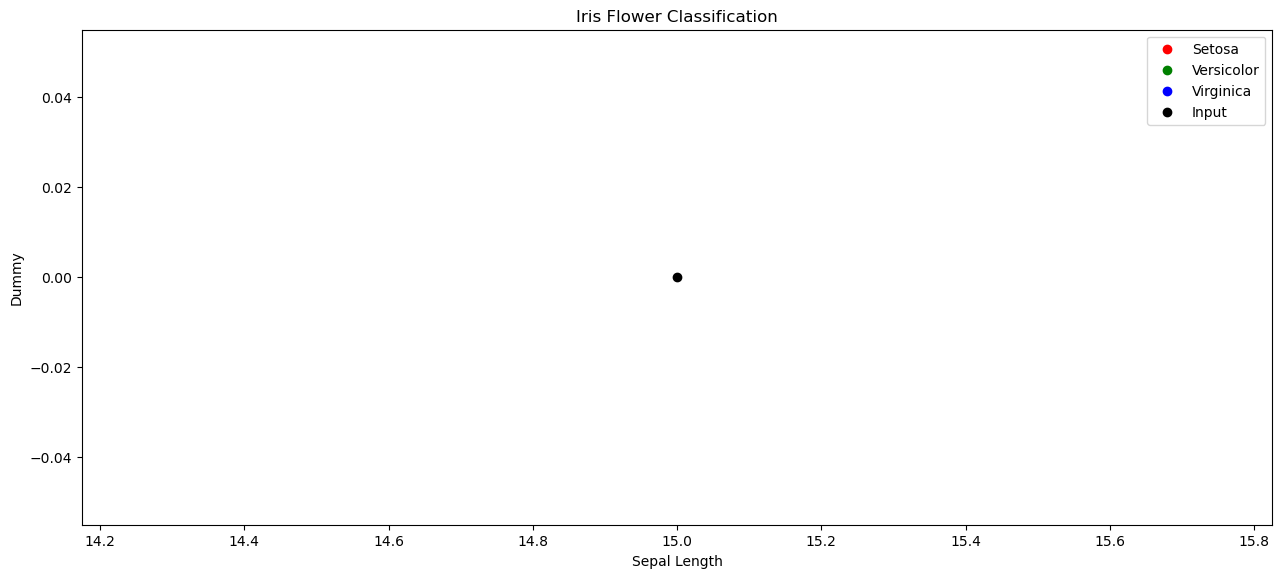

In [34]:
# Plot the data and decision boundary
fig, scatter_plot = plt.subplots()
iris_setosa = iris_data[iris_data['Species'] == 'setosa']
iris_versicolor = iris_data[iris_data['Species'] == 'versicolor']
iris_virginica = iris_data[iris_data['Species'] == 'virginica']

scatter_plot.scatter(iris_setosa['SepalLengthCm'], np.zeros_like(iris_setosa['SepalLengthCm']), color='r', label='Setosa')
scatter_plot.scatter(iris_versicolor['SepalLengthCm'], np.zeros_like(iris_versicolor['SepalLengthCm']), color='g', label='Versicolor')
scatter_plot.scatter(iris_virginica['SepalLengthCm'], np.zeros_like(iris_virginica['SepalLengthCm']), color='b', label='Virginica')

scatter_plot.set_xlabel('Sepal Length')
scatter_plot.set_ylabel('Dummy')
scatter_plot.set_title('Iris Flower Classification')
scatter_plot.legend()

plot_canvas = FigureCanvasTkAgg(fig, master=root)
plot_canvas.draw()
plot_canvas.get_tk_widget().pack(side=TOP, fill=BOTH, expand=1)

root.mainloop()

In [ ]:
o